# Pre-Processing

classes > 1000 amostras 

StyleId == Target 

In [301]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 23)
df = pd.read_csv('/home/gabriel/Documents/MachineLearning-Files/Exercicios/Datasets/recipeData.csv', encoding= 'iso-8859-1')


In [302]:
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [303]:
# Verifing  null-values

df.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

Columns to remove:

* Name
* Style
* URL
* MashThickness
* PrimingMethod
* PrimingAmount
* UserId
* PitchRate
* PrimaryTemp
* BeerID

Columns to change class type:

* SugarScale
* BrewMethod

Change null-values to Mean-values:

* BoilGravity



In [305]:
df['SugarScale'].value_counts()

Specific Gravity    71959
Plato                1902
Name: SugarScale, dtype: int64

In [306]:
df["BrewMethod"].value_counts()

All Grain       49692
BIAB            12016
extract          8626
Partial Mash     3527
Name: BrewMethod, dtype: int64

In [307]:
# Drop shit Data
data_to_remove = ['BeerID','Name', 'URL', 'MashThickness', 'PrimingMethod',
                 'PrimingAmount', 'UserId', 'Style', 'PrimaryTemp', 'PitchRate']

for shit in data_to_remove:
    df.drop(shit, axis=1 , inplace=True)

In [308]:
# Change Columns Class in Object to Int values:

df['SugarScale'] = df['SugarScale'].replace('Specific Gravity', 0)
df['SugarScale'] = df['SugarScale'].replace('Plato', 1)
df['SugarScale'] = df['SugarScale'].replace('All Grain', 2)


df['BrewMethod'] = df['BrewMethod'].replace('All Grain', 0)
df['BrewMethod'] = df['BrewMethod'].replace('BIAB', 1)
df['BrewMethod'] = df['BrewMethod'].replace('extract', 2)
df['BrewMethod'] = df['BrewMethod'].replace('Partial Mash', 3)

In [309]:
remove_na = ['StyleID','Size(L)','OG','FG','ABV','IBU','Color',
             'BoilSize','BoilTime','Efficiency','SugarScale',
             'BrewMethod']        


for values in remove_na:
    df[values].fillna(method='ffill', inplace=True)


In [310]:
# Null-Values of PrimaryTemp for Mean-Values
BoilGravity_Mean = df["BoilGravity"].mean()

df["BoilGravity"].fillna(method='ffill', inplace=True)
print(BoilGravity_Mean)

1.3539547487688244


In [311]:
df.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,0,0
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,0,0
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.070,70.0,0,2
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.070,70.0,0,0
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,0,0


In [312]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StyleID      73861 non-null  int64  
 1   Size(L)      73861 non-null  float64
 2   OG           73861 non-null  float64
 3   FG           73861 non-null  float64
 4   ABV          73861 non-null  float64
 5   IBU          73861 non-null  float64
 6   Color        73861 non-null  float64
 7   BoilSize     73861 non-null  float64
 8   BoilTime     73861 non-null  int64  
 9   BoilGravity  73861 non-null  float64
 10  Efficiency   73861 non-null  float64
 11  SugarScale   73861 non-null  int64  
 12  BrewMethod   73861 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 7.3 MB


(73861, 13)

In [313]:
# Visualizando Quais classes possuem mas de 1000 amostras

print(df['StyleID'].value_counts())

7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: StyleID, Length: 176, dtype: int64


In [314]:
# Selecionando as classes somente com mais de 1000 amostras
selecao = df.loc[df["StyleID"].isin([7, 10, 134, 9, 4, 30, 86, 12, 92, 6, 175, 39])]

In [315]:
selecao.shape

(35424, 13)

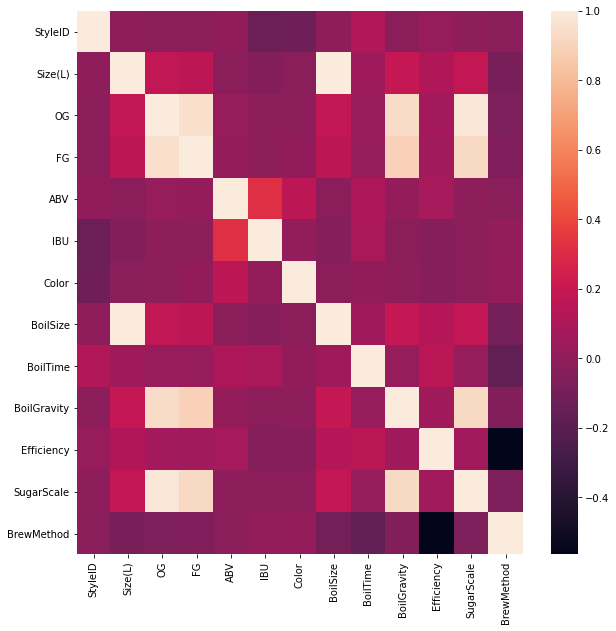

In [316]:
# Visualizando as Correlações com HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(selecao.corr())
plt.show()

In [317]:
df.isnull().sum()

StyleID        0
Size(L)        0
OG             0
FG             0
ABV            0
IBU            0
Color          0
BoilSize       0
BoilTime       0
BoilGravity    0
Efficiency     0
SugarScale     0
BrewMethod     0
dtype: int64

# NOW IT'S TIME FOR ML SHIT

## Decision Tree Regressor

In [318]:
# Separate the data
y = selecao['StyleID']
x = selecao.drop('StyleID', axis=1)

In [336]:
def modelosclassificacao(a, b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    skfold = StratifiedKFold(n_splits=3)
    x = a
    y = b
    #Normalizando as variáveis preditoras para o KNN:
    normalizador = MinMaxScaler(feature_range=(0, 1))
    x_norm = normalizador.fit_transform(x)
    
    logist = LogisticRegression(max_iter=40)
    naive = GaussianNB()
    decision_tree = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    resul_logist = cross_val_score(logist,x,y,cv = skfold)
    resul_naive = cross_val_score(naive,x,y,cv=skfold)
    resul_decision_tree = cross_val_score(decision_tree,x,y,cv=skfold)
    resul_knn = cross_val_score(knn,x,y,cv=skfold)
    dic_classmodels = {'logistica':resul_logist.mean(), 'Naive':resul_naive.mean(), 'Decision Tree':resul_decision_tree,
                      'KNN':resul_knn.mean()}
    #melhor_modelo = max(dic_classmodels, key=dic_classmodels.get)
    print('Regressão Logistica:', resul_logist.mean(), 'Naive Bayes:', resul_naive.mean(), "Decision Tree", 
         resul_decision_tree.mean(), 'KNN:', resul_knn.mean())
    #print('O melhor modelo foi:>', melhor_modelo, 'Com o valor:', dic_classmodels[melhor_modelo])
    
    

In [337]:
modelosclassificacao(x, y)

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Regressão Logistica: 0.4259823848238482 Naive Bayes: 0.41536811201445345 Decision Tree 0.4623701445347787 KNN: 0.502710027100271
